In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


import cv2
import numpy as np
import os
from keras.applications.vgg16 import VGG16
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

train_path = "/content/drive/MyDrive/Dataset/train"
val_path = "/content/drive/MyDrive/Dataset/valid"

img_size = (224, 224)
batch_size = 64

def preprocess_image(img):
    img = cv2.resize(img, img_size)
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

base_model = VGG16(weights="imagenet", include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(patience=5, monitor="val_loss")

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Models/best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/best_model.h5')

# Continue the training from the last saved epoch
initial_epoch = 50

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs= 55,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[early_stopping, checkpoint],
    initial_epoch=initial_epoch
)

val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print("Validation accuracy:", val_acc)



Found 7768 images belonging to 4 classes.
Found 1937 images belonging to 4 classes.


<ipython-input-3-85357b12561b>:70: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 51/55
 42/121 [=========>....................] - ETA: 49:37 - loss: 0.1842 - accuracy: 0.9427

KeyboardInterrupt: ignored

In [ ]:
import cv2
import numpy as np
import os
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

train_path = "/content/drive/MyDrive/Dataset/train"
val_path = "/content/drive/MyDrive/Dataset/valid"

img_size = (224, 224)
batch_size = 64

def preprocess_image(img):
    img = cv2.resize(img, img_size)
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

early_stopping = EarlyStopping(patience=5, monitor="val_loss")

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Models/best_modell.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/best_modell.h5')
# Continue the training from the last saved epoch
initial_epoch = 50

history1 = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[early_stopping, checkpoint],
    initial_epoch=initial_epoch
)

val_loss, val_acc = model.evaluate(val_generator, verbose=1)
print("Validation accuracy:", val_acc)


Found 7768 images belonging to 4 classes.
Found 1937 images belonging to 4 classes.
87910968/87910968 [==============================] - 3s 0us/step


<ipython-input-3-6143a0fba8ef>:69: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


31/31 [==============================] - 174s 6s/step - loss: 0.0600 - accuracy: 0.9799
Validation accuracy: 0.9798657894134521


31/31 [==============================] - 169s 5s/step


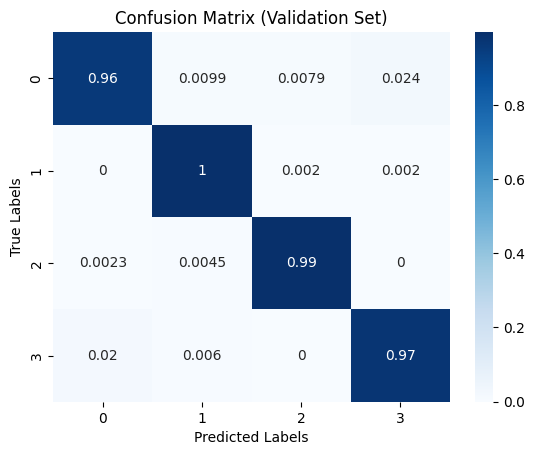

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Use the validation generator to predict the classes of the validation set
y_true = val_generator.classes
Y_pred = model.predict(val_generator, val_generator.n // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Use the validation generator to predict the classes of the validation set
y_true = val_generator.classes
Y_pred = model.predict(val_generator, steps=val_generator.n // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


31/31 [==============================] - 169s 5s/step
[[483   5   4  12]
 [  0 489   1   1]
 [  1   2 437   0]
 [ 10   3   0 489]]


1/1 [==============================] - 0s 414ms/step


IndexError: ignored

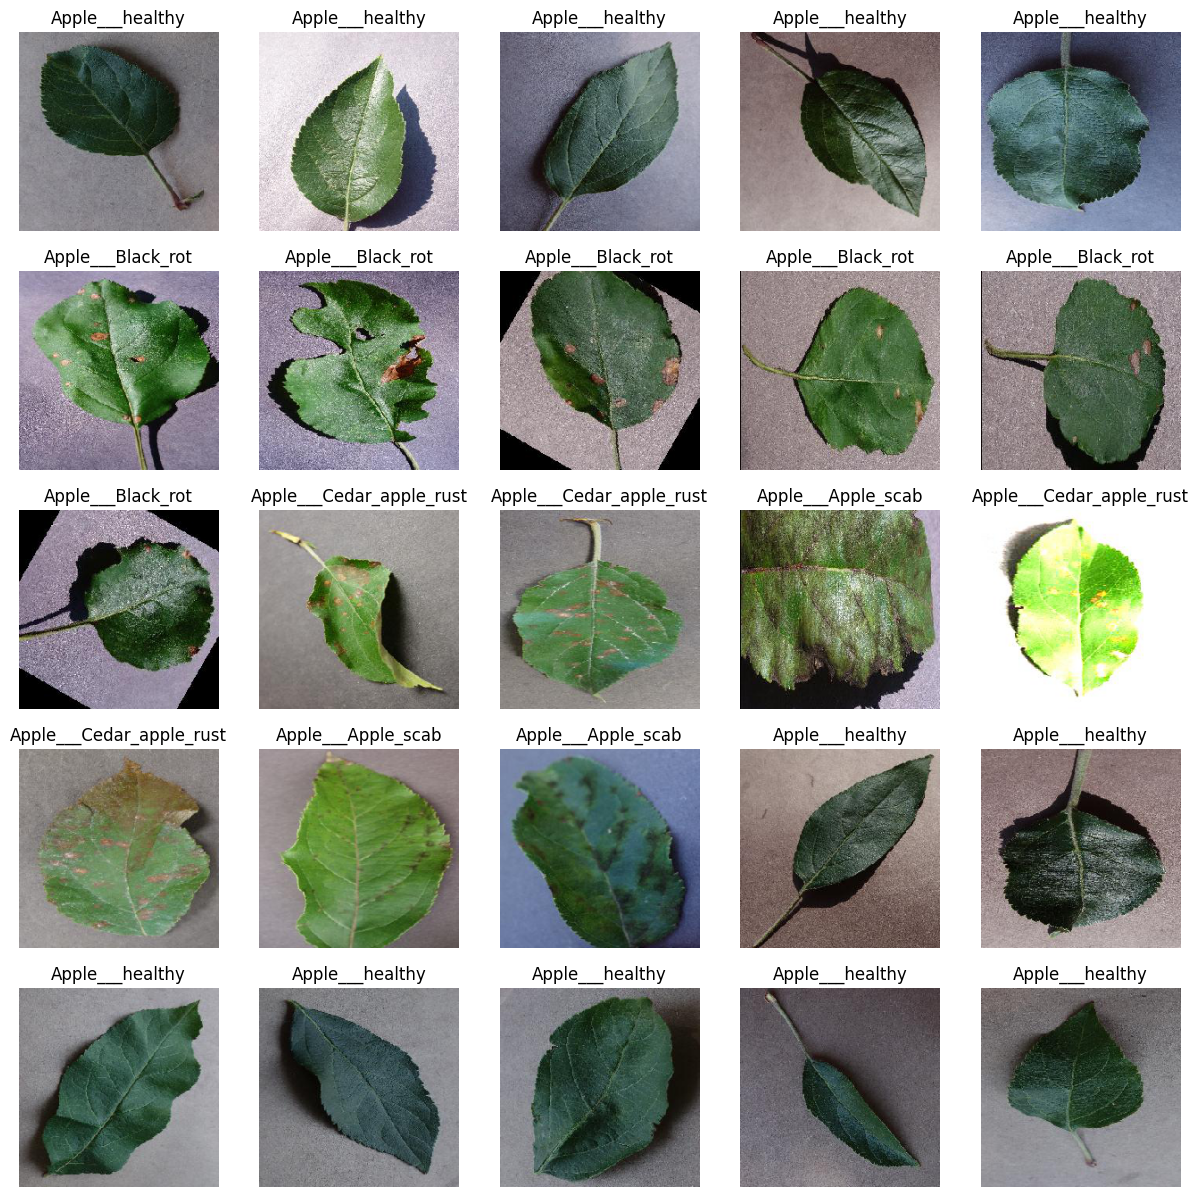

In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img



# Define the path to the test images
test_path = '/content/drive/MyDrive/Dataset/test/test'

# Define the image size
img_size = (224, 224)

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/best_model.h5')

# Define the list of class names
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']

# Load the test images, make predictions, and display the images with predicted classes
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
axs = axs.ravel()

for i, img_file in enumerate(os.listdir(test_path)):
    # Load the test image
    img = load_img(os.path.join(test_path, img_file), target_size=img_size)

    # Preprocess the image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.

    # Make a prediction and get the predicted class
    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]

    # Display the image with predicted class
    axs[i].imshow(img)
    axs[i].set_title(pred_class)
    axs[i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()



In [ ]:
import cv2
import numpy as np
import os
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

test_path = "/content/drive/MyDrive/Dataset/valid"
img_size = (224, 224)
batch_size = 4

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# InceptionV3 model evaluation
model_1 = load_model('/content/drive/MyDrive/Models/best_modell.h5')
loss_1, acc_1 = model_1.evaluate(test_generator, verbose=1)
print("InceptionV3 Test accuracy:", acc_1)

# VGG16 model evaluation
model_2 = load_model('/content/drive/MyDrive/Models/best_model.h5')
loss_2, acc_2 = model_2.evaluate(test_generator, verbose=1)
print("VGG16 Test accuracy:", acc_2)

# Predict class labels for test data
y_true = test_generator.classes

# InceptionV3 predictions and confusion matrix
y_pred1 = np.argmax(model_1.predict(test_generator), axis=-1)
cm1 = confusion_matrix(y_true, y_pred1)
print("InceptionV3 Confusion Matrix:")
print(cm1)

# VGG16 predictions and confusion matrix
y_pred2 = np.argmax(model_2.predict(test_generator), axis=-1)
cm2 = confusion_matrix(y_true, y_pred2)
print("VGG16 Confusion Matrix:")
print(cm2)

# Plot comparison graph
plt.bar(['InceptionV3', 'VGG16'], [acc_1, acc_2])
plt.ylim([0,1])
plt.title('Test Set Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Plot confusion matrices
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cm1, cmap=plt.cm.Blues)
plt.title("InceptionV3 Confusion Matrix")
plt.colorbar()
plt.xticks(range(2), ['Diseased', 'Normal'])
plt.yticks(range(2), ['Diseased', 'Normal'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(1,2,2)
plt.imshow(cm2, cmap=plt.cm.Blues)
plt.title("VGG16 Confusion Matrix")
plt.colorbar()
plt.xticks(range(2), ['Diseased', 'Normal'])
plt.yticks(range(2), ['Diseased', 'Normal'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.show()

import seaborn as sns

# Plot the heat map for InceptionV3 confusion matrix
sns.heatmap(cm1, cmap="Blues", annot=True, fmt='g', xticklabels=['Diseased', 'Normal'], yticklabels=['Diseased', 'Normal'])
plt.title("InceptionV3 Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Plot the heat map for VGG16 confusion matrix
sns.heatmap(cm2, cmap="Blues", annot=True, fmt='g', xticklabels=['Diseased', 'Normal'], yticklabels=['Diseased', 'Normal'])
plt.title("VGG16 Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Define the path to the test images
test_path = '/content/drive/MyDrive/Dataset/test/test'

# Define the image size
img_size = (224, 224)

# Load the saved model
model = load_model('/content/drive/MyDrive/Models/best_model.h5')

# Define the list of class names
class_names = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy']

# Load the test images, make predictions, and display the images with predicted classes
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
axs = axs.ravel()

# Track the number of correct predictions
num_correct = 0

for i, img_file in enumerate(os.listdir(test_path)):
    # Load the test image
    img = load_img(os.path.join(test_path, img_file), target_size=img_size)

    # Preprocess the image
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.

    # Make a prediction and get the predicted class
    pred = model.predict(img_array)
    pred_class = class_names[np.argmax(pred)]

    # Check if the predicted class matches the actual class
    actual_class = img_file.split('_')[0]
    if actual_class == pred_class.split('___')[0]:
        num_correct += 1

    # Display the image with predicted class
    axs[i].imshow(img)
    axs[i].set_title(pred_class)
    axs[i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Compute and display the test accuracy
test_accuracy = num_correct / len(os.listdir(test_path))
print('Test accuracy: {:.2f}%'.format(test_accuracy * 100))

plt.show()